In [28]:
import os
import sys
from os.path import join
path = os.path.realpath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(path)
from src.common import *

res_file = join(RESULTS_DIR, "results_run.json")

import json


with open(res_file, 'r') as f:
  data = json.load(f)
import pandas as pd
data_0= data[0]
columns = list(data_0.keys())
df_res = pd.DataFrame(columns=columns)
idx=0
for d in data:
  df_res.loc[idx]=list(d.values())
  idx+=1

df_res.head()
df_res["split_val"]*=100
df_res["split_val"]= df_res["split_val"].round(0)

df_res.rename(columns={
  "n_params": "N Params",
  "split_val": "Training %",
  "mse": "MSE, %"
}, inplace=True)
df_res.head()

,N Params,Training %,param_date,"MSE, %"
0,6,50.0,True,5.536274
1,6,50.0,False,19.606900
2,6,55.0,True,5.474019
3,6,55.0,False,19.317832
4,6,60.0,True,5.307191


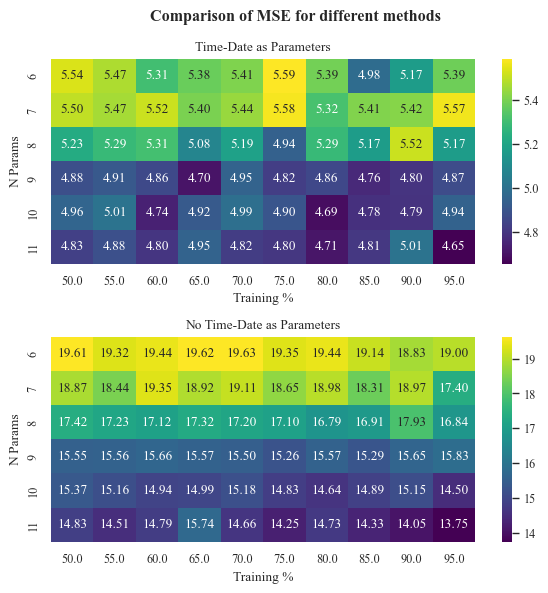

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pandas.errors import SettingWithCopyWarning
sns.set_theme()
sns.set(context="paper", style="darkgrid", font="Times New Roman")

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df_res_ts = df_res[df_res["param_date"]==True]
df_res_ts.drop("param_date",axis=1, inplace=True)
df_res_ts=df_res_ts.pivot(index="N Params", columns="Training %", values = "MSE, %")

df_res_no_ts = df_res[df_res["param_date"]==False]
df_res_no_ts.drop("param_date",axis=1, inplace=True)
df_res_no_ts=df_res_no_ts.pivot(index="N Params", columns="Training %", values = "MSE, %")

fig, axs = plt.subplots(2,1,figsize=(6,6 ))
sns.heatmap(data=df_res_ts, cmap="viridis", annot=True, fmt=".2f", ax=axs[0])
sns.heatmap(data=df_res_no_ts, cmap="viridis", annot=True, fmt=".2f", ax=axs[1])
axs[0].set_title("Time-Date as Parameters")
axs[1].set_title("No Time-Date as Parameters")
fig.suptitle("Comparison of MSE for different methods", fontweight="bold")
fig.tight_layout()
fig.savefig(join(RESULTS_DIR,"heatmap.png"), bbox_inches='tight', dpi=600)
